# Individual project on Minecraft data

## 1: Explore Datasets

Lets start with loading two given data files and looking ehat information we have to work with 

In [49]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
print(players_data)
print(sessions_data)

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      17
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

*Some comments on data:*

- players.csv contains information about all players that joined a server. There are 196 unique players and each of them has information on their experience, subscribtoin, email, played hours, name, gender and age. Total 7 variables with 196 observations.

- sessions_data contains informationa about each play session that was initialized by any player. There are 1535 sessions and each one has the email of the player, start time, end time , and original start and end times. Overall there are 5 variables and 1535 observations in this data file.


After we are introduced to the data, let's think about a predictive question that this project will try to answer. 

My question is: 

**Can we predict if a player would by a subscription based on the amount of their play sessions, their total time played their rating and age?**

To answer this question I will need to clean and wrangle the data, mutate it a little bit, build a predictive model using Classification mode and then test how well my model really works. 

## 2: Cleaning and warangling

Now we have two data files which contain a different information: players and their sessions, however, for my project I wuold like to transfer sessions data to a different format. I want to understand how many playing sessions does each player has. 

To do that I will mutate the sessions data so it will be groupped by email and willl have a variable count (how many sessions did each player have) and then I will match the hashed email in players dataset with the same variable in sessions dataset and pull the amount of sessions to the players data. 

Important note! I don't really need time started and time ended variables so I will just filter them out and not use them further. 

In [10]:
sessions_amt <- sessions_data |> group_by(hashedEmail) |> summarize(sessions = n())
print(sessions_amt)

# A tibble: 125 × 2
   hashedEmail                                                      sessions
   <chr>                                                               <int>
 1 0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832        2
 2 060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967        1
 3 0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387        1
 4 0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3       13
 5 0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a        2
 6 11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4        1
 7 119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760        1
 8 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3       41
 9 1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0        1
10 1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd        1
# ℹ 115 more rows


Interesting aspect to take care of is amount of ACTIVE players. Let's make sure that numbers that we have from 2 files are matching. From sessions file we see that there are 125 players who have at least 1 playing session, so our players ddata should have 125 players with hours played != 0. Lets check it. 

In [12]:
players_data |> filter(played_hours != 0) |> print()

# A tibble: 111 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 4 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 5 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      17
 6 Veteran    TRUE      7a4686586d290c67179275c…          1.6 Lane  Female    23
 7 Beginner   TRUE      4bed6f49b672974f706aa7f…          1.5 Sarah Female    25
 8 Amateur    TRUE      3caa832978e0596779f4ee7…          0.2 That… Male      22
 9 Amateur    TRUE      a175d4741dc84e6baf77901…         48.4 Xand… Female    17
10 Amateur    TRUE      ab1f44f93c3b828f5545897…          0.5 Marl… Male      17
# ℹ 101 

That is a little strange: we have 125 players who have played on the server, but only 111 players with information about them. It is not a problem though, because we should have session info for every player.

Lets now merge the datasets so players will have a new column called sessions. I will instantly filter out players with sessions = NA.

In [16]:
players_full_data <- players_data |> left_join(sessions_amt, by = "hashedEmail") |> filter(sessions != "NA")
print(players_full_data)

# A tibble: 125 × 8
   experience subscribe hashedEmail     played_hours name  gender   Age sessions
   <chr>      <lgl>     <chr>                  <dbl> <chr> <chr>  <dbl>    <int>
 1 Pro        TRUE      f6daba428a5e19…         30.3 Morg… Male       9       27
 2 Veteran    TRUE      f3c813577c458b…          3.8 Chri… Male      17        3
 3 Veteran    FALSE     b674dd7ee0d240…          0   Blake Male      17        1
 4 Amateur    TRUE      23fe711e0e3b77…          0.7 Flora Female    21        1
 5 Regular    TRUE      7dc01f10bf2067…          0.1 Kylie Male      21        1
 6 Amateur    FALSE     1d2371d8a35c88…          0   Emer… Male      21        1
 7 Amateur    TRUE      8b71f4d66a3838…          0.1 Nata… Male      17        1
 8 Veteran    TRUE      7a4686586d290c…          1.6 Lane  Female    23        3
 9 Beginner   TRUE      4bed6f49b67297…          1.5 Sarah Female    25        1
10 Amateur    TRUE      3caa832978e059…          0.2 That… Male      22        1
# ℹ 115 

As we can see, we noe have 125 players with session info. Some of them have played_hours = 0 and sessions = 1. That is okay as we expected the same situation. Let's just double check how many players have this situation. 

In [18]:
players_full_data |> filter(played_hours == 0, sessions == 1) |> print()

# A tibble: 14 × 8
   experience subscribe hashedEmail     played_hours name  gender   Age sessions
   <chr>      <lgl>     <chr>                  <dbl> <chr> <chr>  <dbl>    <int>
 1 Veteran    FALSE     b674dd7ee0d240…            0 Blake Male      17        1
 2 Amateur    FALSE     1d2371d8a35c88…            0 Emer… Male      21        1
 3 Regular    TRUE      e21a324ccf5c87…            0 Faye  Male      17        1
 4 Amateur    TRUE      dbb20960cd4db4…            0 Jia   Female    26        1
 5 Amateur    TRUE      25879aecc20554…            0 Eli   Female    17        1
 6 Amateur    FALSE     2917e2dacafed9…            0 Haid… Two-S…    26        1
 7 Beginner   FALSE     722ab6d91280c4…            0 Leyla Female    17        1
 8 Beginner   TRUE      ed3e6d043dee74…            0 Hami… Male      17        1
 9 Beginner   TRUE      7b5c323f9a9e21…            0 Xenos Two-S…    17        1
10 Regular    FALSE     a2a0612e9a7da5…            0 Corn… Male      18        1
11 Amateu

It makes sence now! There are 125 players with session info, 14 of them has 0 hours and 111 players have hours playedd != 0. We are sure that information matches!

To continue data cleaning I will filter out variables that I won't use futher. They are email, name and gender.

In [20]:
players_work_dt <- players_full_data |> select(-hashedEmail, -name, -gender)
players_work_dt |> print()

# A tibble: 125 × 5
   experience subscribe played_hours   Age sessions
   <chr>      <lgl>            <dbl> <dbl>    <int>
 1 Pro        TRUE              30.3     9       27
 2 Veteran    TRUE               3.8    17        3
 3 Veteran    FALSE              0      17        1
 4 Amateur    TRUE               0.7    21        1
 5 Regular    TRUE               0.1    21        1
 6 Amateur    FALSE              0      21        1
 7 Amateur    TRUE               0.1    17        1
 8 Veteran    TRUE               1.6    23        3
 9 Beginner   TRUE               1.5    25        1
10 Amateur    TRUE               0.2    22        1
# ℹ 115 more rows


To finish this step I will transform experience colunm to a factor type.

In [22]:
players_work_dt <- players_work_dt |> mutate(experience = as_factor(experience))


I can say that my data is ready to work with right now.

## 3: Analizing and Visualizating

I will predict wether the subscription is purchased or not. Lets first see and visualize how many people have the subscription.

subscribe,nun_of_players
<lgl>,<int>
FALSE,32
TRUE,93


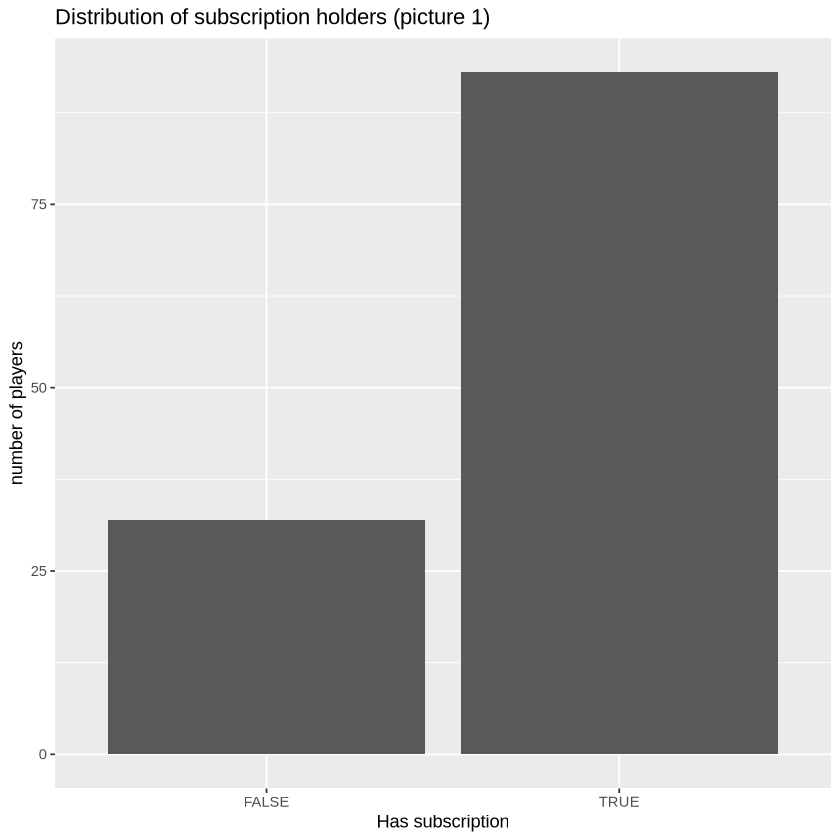

In [45]:
players_work_dt |> group_by(subscribe) |> summarise(nun_of_players = n())
players_work_dt |> group_by(subscribe) |> summarise(nun_of_players = n()) |>
    ggplot(aes(x = subscribe, y = nun_of_players)) + geom_col() + labs(x = "Has subscription", y = "number of players") +
    ggtitle("Distribution of subscription holders (picture 1)")

As we can see there are 3 times more people with subscribtion in our data, but thats fine, and I wont change it here, as there really might be a general trend to purchase a subscription.

I am more interested in diversity of predictors: experience, played_hours, Age and sessions. Lets make the same tibbles experience variable. I won't make it for others as they are numerical :)

experience,nun_of_players
<fct>,<int>
Pro,11
Veteran,27
Amateur,42
Regular,23
Beginner,22


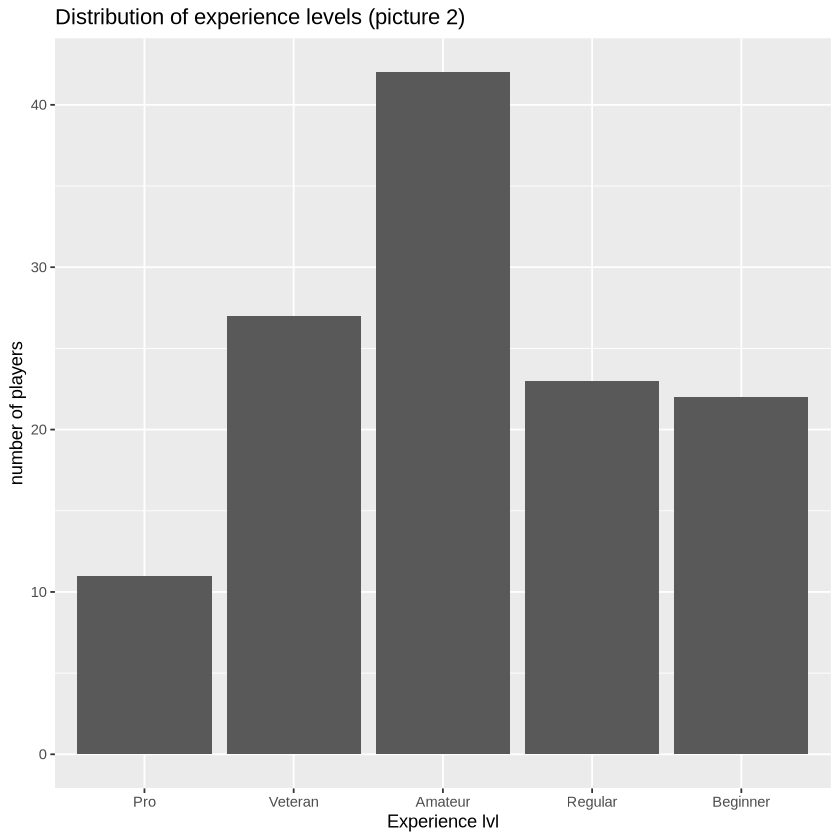

In [44]:
players_work_dt |> group_by(experience) |> summarise(nun_of_players = n())
players_work_dt |> group_by(experience) |> summarise(nun_of_players = n()) |>
    ggplot(aes(x = experience, y = nun_of_players)) + geom_col() + labs(x = "Experience lvl", y = "number of players") +
    ggtitle("Distribution of experience levels (picture 2)")

The distribution seems fine, although there are not a lot of pros, I will leave it like that as being a pro is not as common (if we think logically).

Next lets use a function which allows us to see a relation of our predictors to the predictive variable.

But before that let's split our data to training and testing to work further with training data. Let's devide 75% for teraining and 25% for testing.
I will use set_seed function in the beginning of each cell bellow where i use random, so it will always be "same random". 

In [42]:
set.seed(1234)

data_split <- players_work_dt |> initial_split(prop = .75, strata = subscribe)
training_data <- training(data_split)
testing_data <- testing(data_split)

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


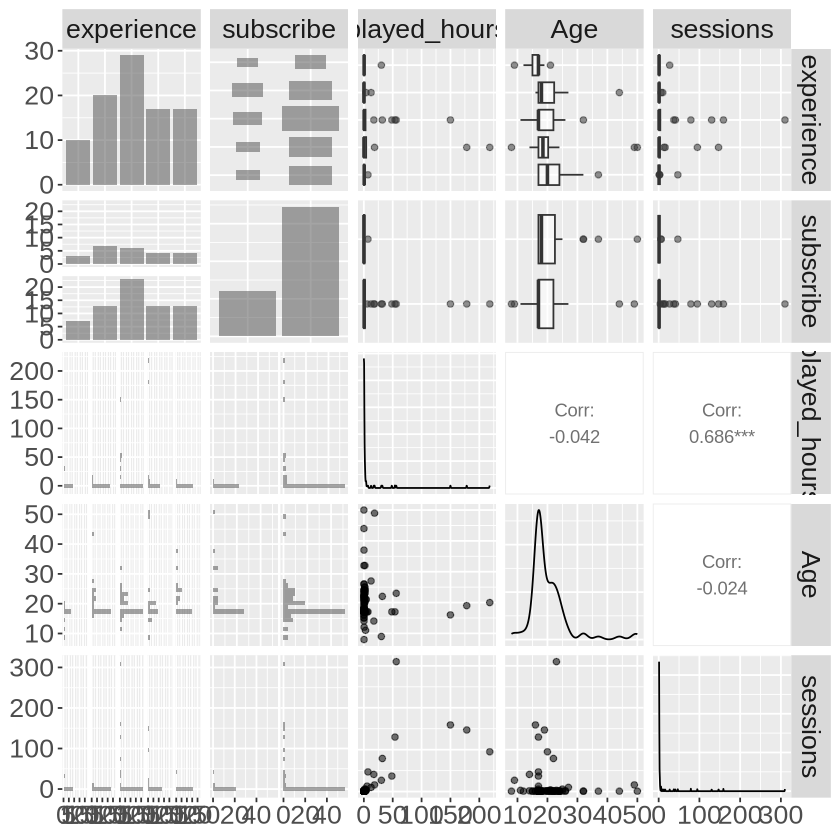

In [50]:
pairplot <- training_data |> 
    ggpairs(mapping = aes(alpha = 0.4)) +
    theme(text = element_text(size = 20))
pairplot

As some data is not numeric it's hard, for me personnaly, to understand something from this graph, so I wont build my work on it's base and reffer to it often. However it would be very hard to visualize everything on a single graph as we have more than 2 variables. I will end this part of the work and move to more interesting and engaging part.